# Customer Segmentation:  How can high value customers be identified?

## Introduction/Context

This project will analyse the Online Retail Data Set from the UCI Machine Learning Repository that can be found here: https://archive.ics.uci.edu/ml/datasets/Online+Retail. 
The data contains records of transactions between 01/12/2010 and 09/12/2011 for a UK based online site in an Excel format.

The aim of the project is to analyse the purchases and transactions made by the  approximately 4000 customers in the datasaet to develop a model for identifying customer segment groups and categories. 
Doing this will help the business to better understand the needs of each customer category and also identify its most valuable customers in order to grow this segment.

Initial analysis of the dataset will help to provide an overview that will be helpful in devising appropriate algorithms for building an effective classification model for the task.

This exercise will focus on acquiring and preparing the dataset for further analysis.
The dataset is available for free download on the UCI website and has been anonymised for widespread machine learning research and modelling.

First step is to explore the data to understand its structure.
This includes processing and preparation of the data for summary statistics and visualisations.







### Import Libraries that will be used for data exploration and processing

pandas for manipulating and processing of labeled and columnar data
numpy for efficient and fast scientific operations on large amount of data 
matplotlib for graphing of data
seaborn for data visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import itertools
%matplotlib inline





## Data Preparation

Data is in an excel format which provides a tabular strtucture that we can use for dataframe manipulation, numerical and statistical analysis.

Information on whether there are null values in the dataset was not available on the UCI website (N/A). Therefore we have to check for this.

In [3]:
#Load the data file

dfRetailData = pd.read_excel("Online Retail.xlsx", sheet_name = "Online Retail")


FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

### Clean up dataset

In [3]:
#View the first lines of dataset to check the contents

dfRetailData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Obtain information about the different columns in the dataset including 

dfRetailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are 8 columns in the dataset and 541909 instances as indicated in UCI dataset description.

There appears to be some null values for Description and Customer ID.  


In [5]:
#Check column distribution of null values and their proportions
 
Column_Info= pd.DataFrame(dfRetailData.dtypes).T.rename(index={0:'column type'})
Column_Info= Column_Info.append(pd.DataFrame(dfRetailData.isnull().sum()).T.rename(index={0:'null values (nb)'}))
Column_Info= Column_Info.append(pd.DataFrame(dfRetailData.isnull().sum()/dfRetailData.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(Column_Info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Almost 25% of the dataset does not have a customer ID.  Looking at the structure of the datasey it will be difficult to replace these null values based on the available information given.  These will be removed
  

In [6]:

#Remove Null Values
dfRetailData.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

#Check null values in dataset and technical info on the columns
dfRetailData.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

It appears removing the null 'CustomerID' values also removed the null 'Description' values.

In [7]:
#Check dataset dimensions
print('Dataframe dimensions:', dfRetailData.shape)


Dataframe dimensions: (406829, 8)


In [8]:
#Find duplicates in dataset and delete them

print('Number of Duplicate Entries: {}'.format(dfRetailData.duplicated().sum()))
dfRetailData.drop_duplicates(inplace = True)

Number of Duplicate Entries: 5225


In [9]:
#Convert nominal types described in UCI source websites into categories

dfRetailData['CustomerID'] = dfRetailData['CustomerID'].astype('int').astype('category')

# Turning object columns into categories also reduces used memory
categories = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for c in categories:
    dfRetailData[c] = dfRetailData[c].astype('category')
print(dfRetailData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  category      
 1   StockCode    401604 non-null  category      
 2   Description  401604 non-null  category      
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  category      
 7   Country      401604 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 16.8 MB
None


Note that memory usage has gone from 33.1+ MB to 16.8MB

### Explore Data


#### 1.0  Dataset Overview



In [10]:
# number of unique values
n_unique = dfRetailData.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64


There are a total of 4372 customers from 37 different countries  and 3684 different products available

##### 1.2 Overview of purchases from different countries

Text(0, 0.5, 'Countries')

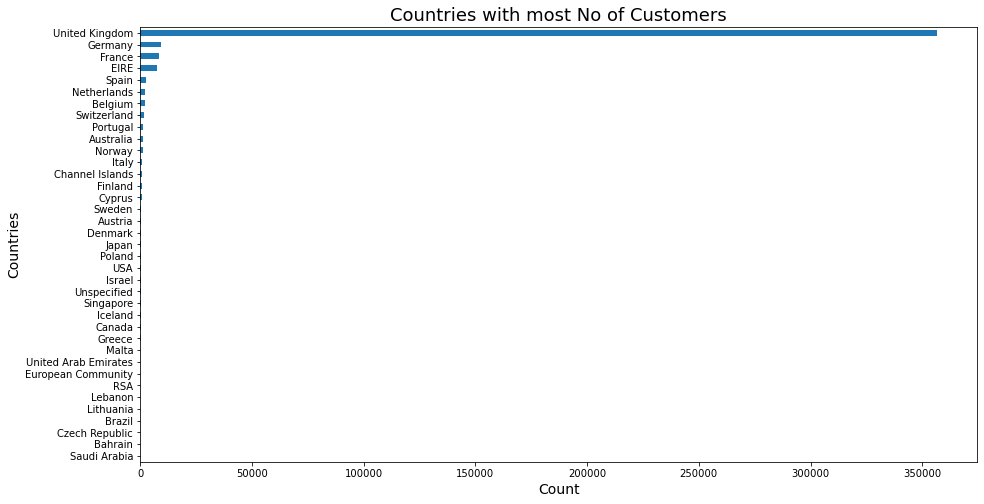

In [11]:
#Plot the distribution of customers by country 
plt.figure(figsize=(15,8))
#Use horizontal bar chart of type 'barh'
dfRetailData.groupby('Country')['CustomerID'].agg('count').sort_values().plot(kind='barh')
plt.title("Countries with most No of Customers",fontsize=18)
plt.xlabel("Count",fontsize=14)
plt.ylabel("Countries",fontsize=14)

It is observed that the large proportion of customers come from the United Kingdom.  Germany follows distantly then France and EIRE.  Spain, Netherlands and Belguim then come after these leading countries

In [12]:
#Copy data for more analysis
data = dfRetailData.copy()
data['Total'] = data['Quantity'] * data['UnitPrice']
data['Invoice_Year'] = data['InvoiceDate'].dt.year
data['Invoice_Month'] = data['InvoiceDate'].dt.month
data['Invoice_Day'] = data['InvoiceDate'].dt.day

Text(0, 0.5, 'Countries')

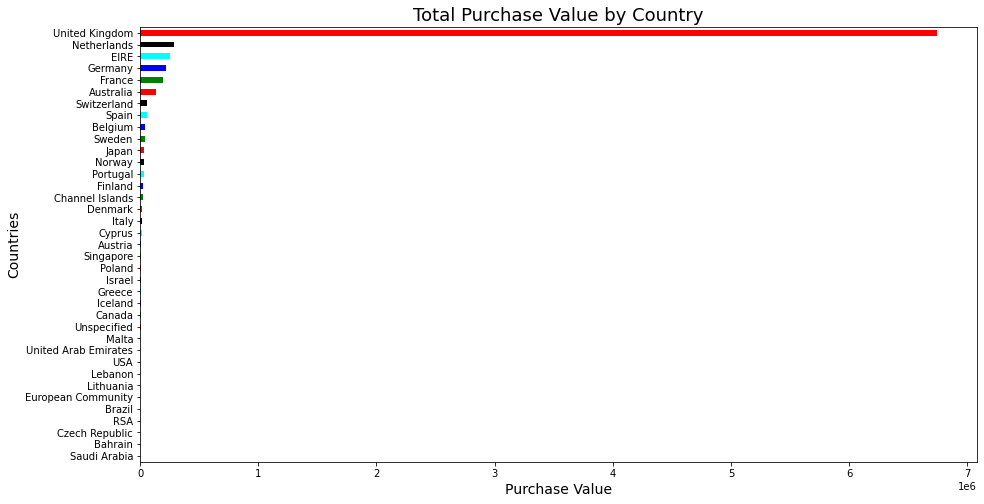

In [13]:
# Check purchase value (Total Sales) by country
plt.figure(figsize=(15,8))
data.groupby('Country')['Total'].sum().sort_values().plot(kind='barh', color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Total Purchase Value by Country",fontsize=18)
plt.xlabel("Purchase Value",fontsize=14)
plt.ylabel("Countries",fontsize=14)


It is observed that the UK remains the most valuable in terms of value of purchases.  
However, Netherlands comes 2nd in purchase value despite having the 6th most number of customers and Australia comes 6th in terms of purchase value while 10th in terms of number of customers.  I

It is noted that Germany and France show lesser value of purchases compared to number of customers from the country.

**This is something to note for future analysis during the modeling and classification phase for identifying location of high value customers.

##### 1.3  Overview of Total Sales with Time

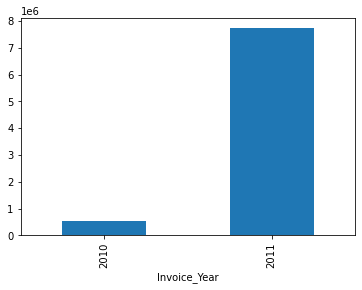

In [14]:
#Sales performance each year
per_year_total = data.groupby('Invoice_Year')['Total'].sum()
per_year_total.plot(kind='bar')
plt.show()


Of the two years in the dataset, most of the sales occured in 2011.  Let's dig deeper into this by checking how sales were distributed monthly

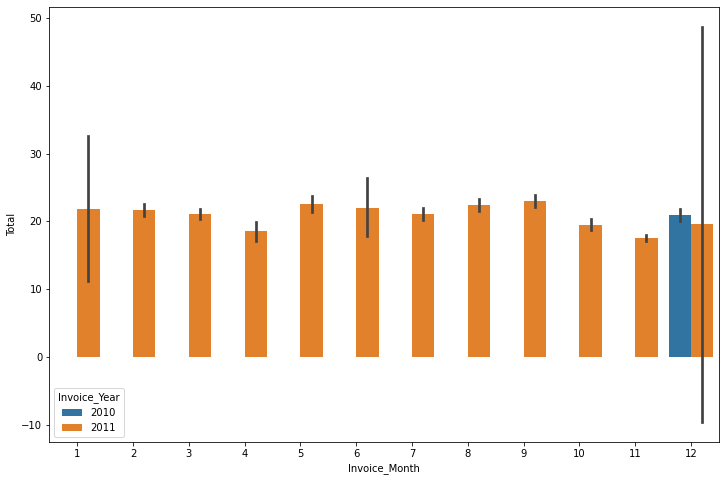

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Invoice_Month', y='Total', data=data, hue='Invoice_Year')
plt.show()

The barplot shows that sales was only recorded for the 12th month in 2010.  The data for the 12th month is significantly spread out with outliers as shown with the error bar.  

*This should be investigated for futher cleaning of data as well as month 1 and 6 for 2011.

#### 2.0 Customer and Purchasing Overview

##### 2.1 Products with the Most Purchase

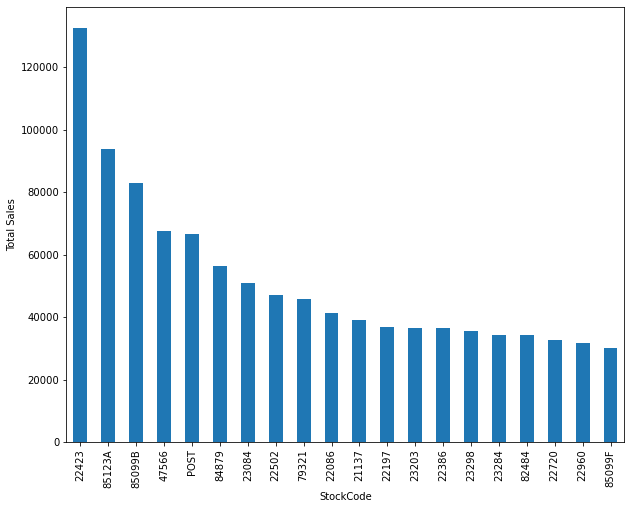

In [16]:
#plot to see the products with the most purchase in the datset
plt.figure(figsize=(10, 8))
top_stock_total = data.groupby('StockCode')['Total'].sum().sort_values(ascending=False)[:20]
top_stock_total.plot(kind='bar')
plt.ylabel('Total Sales')
plt.show()

Product with stock code 2243 produced the most sales in the time period within the dataset

##### 2.2 Group Customers by Quantity Bought


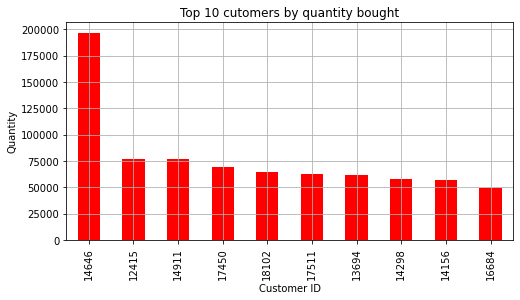

In [23]:
#Find cancelled orders

top_customers = data.groupby('CustomerID')['Quantity'].sum()
top_customers = top_customers.sort_values(ascending=False).head(10)


plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='red')
plt.title('Top 10 cutomers by quantity bought')
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.grid()
plt.show()

##### 2.2 Group Customers by Value of Products Bought

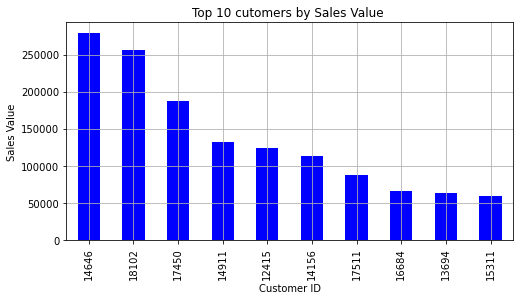

In [28]:
top_customers = data.groupby('CustomerID')['Total'].sum()
top_customers = top_customers.sort_values(ascending=False).head(10)


plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='blue')
plt.title('Top 10 cutomers by Sales Value ')
plt.xlabel('Customer ID')
plt.ylabel('Sales Value')
plt.grid()
plt.show()

It is observed that from the two plots above that some customers buy less quantity but spend more

## Summary

A number of data cleaning operatins were performed on the dataset to remove null values and ensure that the definitions of the columns as categories were preserved.  These actions also improved the efficiency of the data analysis.  
It was observed from data exploration that further analysis for modeling and classificatiion in order to identify high value customers should not only consider quantity of items bought but also their values. 
In addition to specifically identifying high value customers based on Customer ID, it would also be useful to relate high value customers in terms of quantity bought and sales value per customers to the specific countries.
This will help in developing and growing the customer base for international retail sales outside the UK.

## Create Sample Data for Submission



Create a sample of 80000 rows

In [39]:

dfSample = dfRetailData[:80000]
#Check size
print(dfSample.shape)
dfSample.info()
#dfRetailData.memory_usage(index=True).sum()
#dfSample.head()

#Export to Excel

dfSample.to_excel("sample.xlsx", sheet_name='Retail Data')


(80000, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 120561
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    80000 non-null  category      
 1   StockCode    80000 non-null  category      
 2   Description  80000 non-null  category      
 3   Quantity     80000 non-null  int64         
 4   InvoiceDate  80000 non-null  datetime64[ns]
 5   UnitPrice    80000 non-null  float64       
 6   CustomerID   80000 non-null  category      
 7   Country      80000 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 4.3 MB


In [ ]:
#Clear history to release memory
%reset Out

## References

Anaconda, 2021b. NumPy Documentation. [Online] 
Available at: https://numpy.org/doc/stable/user/whatisnumpy.html
[Accessed 13th June 2021].

Anaconda, 2021c. mapplotlib Documentation. [Online] 
Available at: https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
[Accessed 13th June 2021].

Anaconda, 2021d. Categorical data. [Online] 
Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
[Accessed 15th June 2021].

Anaconda, 2021. pandas Documentation. [Online] 
Available at: https://pandas.pydata.org/docs/getting_started/index.html
[Accessed 13th June 2021].

Chen, D., Sain, S. L. & Guo, K., 2012 . Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining. Journal of Database Marketing and Customer Strategy Managemen, 19(3), pp. 197-208.
Harris, A., 2021. The difficulties with pandas categories. [Online] 
Available at: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
[Accessed 15th June 2021].

Pathak, M., 2020. Handling Categorical Data in Python. [Online] 
Available at: https://www.datacamp.com/community/tutorials/categorical-data#categorical
[Accessed 14th June 2021].

UCI Machine Learning Repository, 2021. Online Retail Data Set. [Online] 
Available at: https://archive.ics.uci.edu/ml/datasets/Online+Retail#
[Accessed 13th June 2021].
